In [7]:
#Importing the libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import time
from ipywidgets import widgets
from IPython.display import display

In [8]:
cavideos = pd.read_csv('../yt_data/CAvideos.csv',index_col='video_id')
devideos = pd.read_csv('../yt_data/DEvideos.csv',index_col='video_id')
frvideos = pd.read_csv('../yt_data/FRvideos.csv',index_col='video_id')
gbvideos = pd.read_csv('../yt_data/GBvideos.csv',index_col='video_id')
usvideos = pd.read_csv('../yt_data/USvideos.csv',index_col='video_id')

def func(x):
    try:
        return int(x)
    except ValueError:
        return np.NaN
    
frvideos['views'] = frvideos['views'].apply(func) #remove the gaps in france file
frvideos['likes'] = frvideos['likes'].apply(func)
frvideos['dislikes'] = frvideos['dislikes'].apply(func)
frvideos['comment_count'] = frvideos['comment_count'].apply(func)

cavideos['region'] = 'CA' #set a regionname column
devideos['region'] = 'DE'
frvideos['region'] = 'FR'
gbvideos['region'] = 'GB'
usvideos['region'] = 'US'

frames = [cavideos, devideos, gbvideos, usvideos,frvideos]
allvideos = pd.concat(frames) #concat all the dataframes
allvideos.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [9]:
#sorting the dataframes by column and getting the top 10 for each
idx1 = allvideos.groupby(['video_id'])['views'].transform(max) == allvideos['views']
topviews = allvideos[idx1].sort_values(by=['views'],ascending=False).head(10) 
topviews.loc[:,'views'] /= 1000000

idx2 = allvideos.groupby(['video_id'])['likes'].transform(max) == allvideos['likes']
toplikes = allvideos[idx2].sort_values(by=['likes'],ascending=False).head(10)

idx3 = allvideos.groupby(['video_id'])['dislikes'].transform(max) == allvideos['dislikes']
topdislikes = allvideos[idx3].sort_values(by=['dislikes'],ascending=False).head(10)

idx4 = allvideos.groupby(['video_id'])['comment_count'].transform(max) == allvideos['comment_count']
topcom = allvideos[idx4].sort_values(by=['comment_count'],ascending=False).head(10)

sns.set()

topviews = topviews[['title','views','region']]
topviews.head(10)

toplikes = toplikes[['title','likes','region']]
toplikes.head(10)

topdislikes = topdislikes[['title','dislikes','region']]
topdislikes.head(10)

topcomments = topcom[['title','comment_count','region']]
topcomments.head(10)

columns = ['Views','Likes','Dislikes','Comment Count']
selection = widgets.Dropdown(description = "Trending by ") #use the dropdown widget
selection.options = columns


viewplot = True
likeplot = True
dislikeplot = True
commentplot = True

#plot relevant histograms on clicking a dropdown menu option
def on_button_clicked(b):
    if (selection.value=='Views'):
        global viewplot
        if (viewplot):
            fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
            ax = sns.barplot(y="title", x="views", data=topviews,palette="Blues_d")
            ax.set_title('Top trending videos by Views',fontsize=13)
            ax.set_xlabel("Million Views")
            ax.set_ylabel("")
            ax.xaxis.labelpad = 12
            viewplot = False
    if (selection.value=='Likes'):
        global likeplot
        if (likeplot):
            fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
            ax = sns.barplot(y="title", x="likes", data=toplikes,palette="Greens_d")
            ax.set_title('Top trending videos by Likes',fontsize=13)
            ax.set_xlabel("Likes")
            ax.set_ylabel("")
            plt.xticks(rotation=-45)
            ax.xaxis.labelpad = 12
            likeplot = False
            disabled = True
            fig.savefig('Downloads/views.png')
    if (selection.value=='Dislikes'):
        global dislikeplot
        if (dislikeplot):
            fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
            ax = sns.barplot(y="title", x="dislikes", data=topdislikes,palette="Reds_d")
            ax.set_title('Top trending videos by Dislikes',fontsize=13)
            ax.set_xlabel("Dislikes")
            plt.xticks(rotation=-45)
            ax.set_ylabel("")
            ax.xaxis.labelpad = 12
            dislikeplot = False
    if (selection.value=='Comment Count'):
        global commentplot
        if (commentplot):
            fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
            ax = sns.barplot(y="title", x="comment_count", data=topcomments,palette="Oranges_r")
            ax.set_title('Top trending videos by Comment Count',fontsize=13)
            ax.set_xlabel("Comment Count")
            plt.xticks(rotation=-45)
            ax.set_ylabel("")
            ax.xaxis.labelpad = 12
            commentplot = False
    
        
button = widgets.Button(description="Plot")
display(selection)
display(button)

button.on_click(on_button_clicked)

A Jupyter Widget

A Jupyter Widget

In [10]:
#rescale certain columns
cordf = cavideos[(cavideos['comments_disabled'] == False) & (cavideos['ratings_disabled'] == False )][['views','likes','dislikes','comment_count']]
cordf['views'] = cordf['views']/1000000
cordf['likes'] = cordf['likes']/1000
cordf['dislikes'] = cordf['dislikes']/1000
cordf['comment_count'] = cordf['comment_count']/1000
cordf.rename(index=str, columns={"views": "Million Views", "likes": "Thousand likes","dislikes":"Thousand Dislikes","comment_count":"Thousand Comments"},inplace=True)

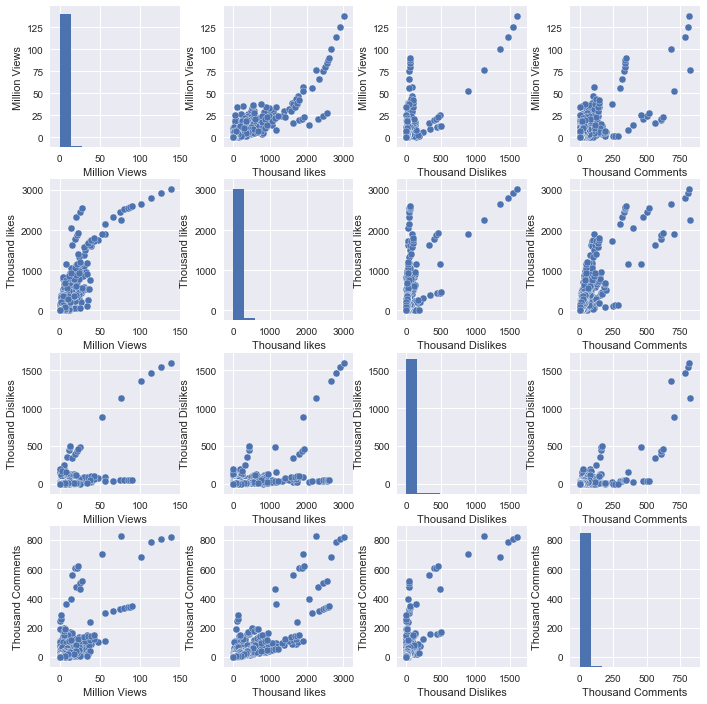

In [11]:
#seaborn pairplot
g = sns.pairplot(cordf)
xlabels,ylabels = [],[]
i=0

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
    
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])
        


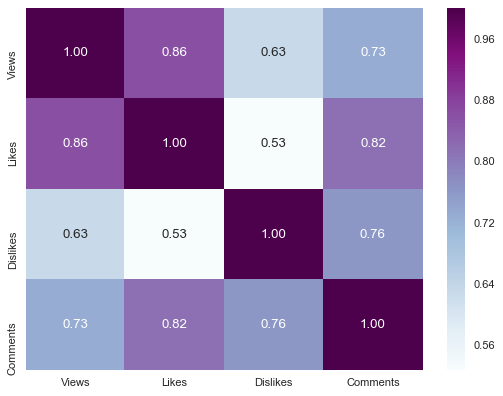

In [12]:
#heatmap of the correlations
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
cordf.rename(index=str, columns={"Million Views":"Views","Thousand likes":"Likes","Thousand Dislikes":"Dislikes","Thousand Comments":"Comments"},inplace=True)
sns.heatmap(cordf.corr(), annot=True, fmt=".2f",cmap="BuPu")

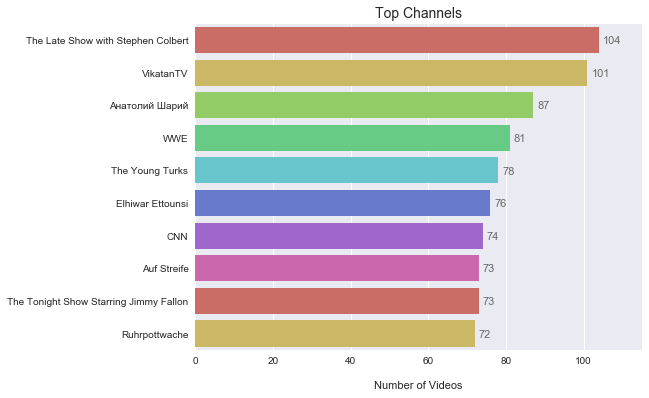

In [13]:
#grouping by 'channel title' and getting the top channels by using max count
groupchan = allvideos.groupby(['channel_title','video_id']).sum()
topchan = groupchan.groupby('channel_title').agg('count')
topchan['trendingnum'] = topchan['views']
topchan = topchan[['trendingnum']]
topchan.reset_index()
plotchan = topchan.sort_values(by=['trendingnum'],ascending=False).head(10)
plt.figure(figsize=(8, 6))
ax = sns.barplot(y="channel_title", x="trendingnum", data=plotchan.reset_index(),palette=sns.color_palette("hls", 8))
ax.set_ylabel("")
ax.set_title('Top Channels',fontsize=14)
ax.set_xlabel("Number of Videos",fontsize=11)
ax.set_xlim(0,115)
ax.xaxis.labelpad = 15

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.51, \
            str(int(round((i.get_width()), 2))), fontsize=11, color='dimgrey')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

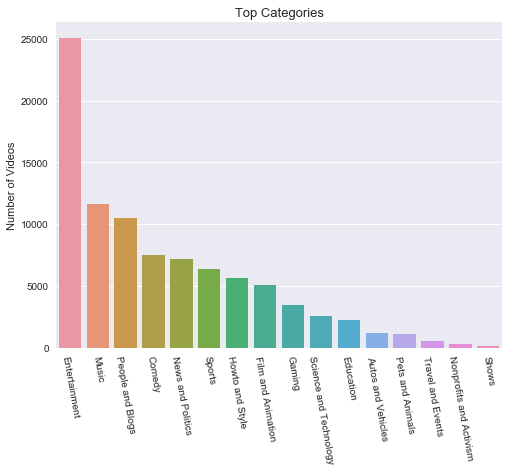

In [14]:
catdict = {1:'Film and Animation',2:'Autos and Vehicles',10:'Music',15:'Pets and Animals',17:'Sports',19:'Travel and Events',
          20:'Gaming',22:'People and Blogs',23:'Comedy',24:'Entertainment',25:'News and Politics',26:'Howto and Style',27:'Education',
          28:'Science and Technology',29:'Nonprofits and Activism',43:'Shows'} #dictionary of the category names

catlist = allvideos['category_id']
catcount = catlist.reset_index().groupby('category_id').agg('count').head(16)
catcount.reset_index(inplace=True)

catcount["category_name"] = catcount["category_id"].map(catdict)  #map category_id to category_name
catcount.sort_values(by=['video_id'],ascending=False,inplace=True)

#Plot the top categories
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="category_name", y="video_id", data=catcount)
ax.set_title('Top Categories',fontsize=13)
ax.set_xlabel("")
ax.set_ylabel("Number of Videos")
plt.xticks(rotation=-80)

In [ ]:
cat24 = allvideos[allvideos['category_id'] == 24]
cat24grpd = cat24.groupby('video_id').agg('count')['title'] #how many days does the same video_id repeat for

plt.figure(figsize=(8, 6))
ax = sns.distplot(cat24grpd,bins=50,kde=False,rug=True,color="g")
ax.set_xlim(0,20)
ax.xaxis.labelpad = 15
ax.set_title('How long videos trend')
ax.set_xlabel("Days")
ax.set_ylabel("Number of Videos")

Text(0,0.5,'Number of Videos')

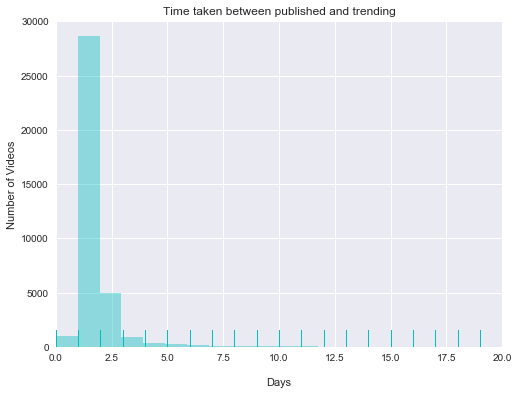

In [10]:
#get the published and trending dates of videos into pandas to_datetime format
allvideos['pdate'], allvideos['ptime'] = allvideos['publish_time'].str.split('T', 1).str
allvideos['trending_date'] = '20' + allvideos['trending_date'].astype(str)
allvideos['trending_date'] = pd.to_datetime(allvideos['trending_date'],format='%Y.%d.%m',errors='coerce')
allvideos['pdate'] = pd.to_datetime(allvideos['pdate'],errors='coerce')
allvideos['date_diff'] = allvideos['trending_date'] - allvideos['pdate']
times = allvideos.groupby('video_id').min()
times['date_diff'] = (times['date_diff'] / np.timedelta64(1, 'D')).astype(float)

plt.figure(figsize=(8, 6))
ax = sns.distplot(times[times['date_diff']<50]['date_diff'],bins=50,kde=False,rug=True,color="c")
ax.set_xlim(0,20)
ax.xaxis.labelpad = 15
ax.set_title('Time taken between published and trending')
ax.set_xlabel("Days")
ax.set_ylabel("Number of Videos")

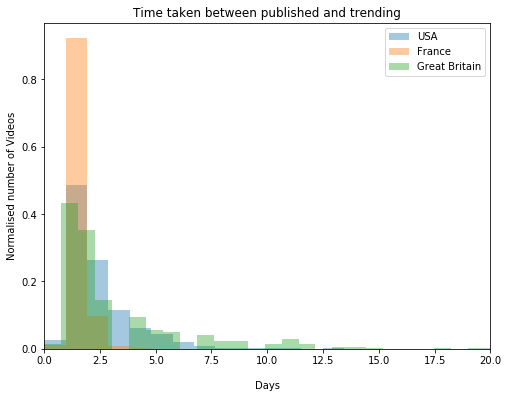

In [20]:
#Repeat the previous procedure for each region
usvideos['pdate'], usvideos['ptime'] = usvideos['publish_time'].str.split('T', 1).str
usvideos['trending_date'] = '20' + usvideos['trending_date'].astype(str)
usvideos['trending_date'] = pd.to_datetime(usvideos['trending_date'],format='%Y.%d.%m',errors='coerce')
usvideos['pdate'] = pd.to_datetime(usvideos['pdate'],errors='coerce')
usvideos['date_diff'] = usvideos['trending_date'] - usvideos['pdate']
ustimes = usvideos.groupby('video_id').min()
ustimes['date_diff'] = (ustimes['date_diff'] / np.timedelta64(1, 'D')).astype(float)

frvideos['pdate'], frvideos['ptime'] = frvideos['publish_time'].str.split('T', 1).str
frvideos['trending_date'] = '20' + frvideos['trending_date'].astype(str)
frvideos['trending_date'] = pd.to_datetime(frvideos['trending_date'],format='%Y.%d.%m',errors='coerce')
frvideos['pdate'] = pd.to_datetime(frvideos['pdate'],errors='coerce')
frvideos['date_diff'] = frvideos['trending_date'] - frvideos['pdate']
frtimes = frvideos.groupby('video_id').min()
frtimes['date_diff'] = (frtimes['date_diff'] / np.timedelta64(1, 'D')).astype(float)

gbvideos['pdate'], gbvideos['ptime'] = gbvideos['publish_time'].str.split('T', 1).str
gbvideos['trending_date'] = '20' + gbvideos['trending_date'].astype(str)
gbvideos['trending_date'] = pd.to_datetime(gbvideos['trending_date'],format='%Y.%d.%m',errors='coerce')
gbvideos['pdate'] = pd.to_datetime(gbvideos['pdate'],errors='coerce')
gbvideos['date_diff'] = gbvideos['trending_date'] - gbvideos['pdate']
gbtimes = gbvideos.groupby('video_id').min()
gbtimes['date_diff'] = (gbtimes['date_diff'] / np.timedelta64(1, 'D')).astype(float)

plt.figure(figsize=(8, 6))
sns.distplot(ustimes[ustimes['date_diff']<50]['date_diff'],bins=50,kde=False,norm_hist=True,label="USA")
sns.distplot(frtimes[frtimes['date_diff']<50]['date_diff'],bins=50,kde=False,norm_hist=True,label="France")
ax = sns.distplot(gbtimes[gbtimes['date_diff']<50]['date_diff'],bins=50,kde=False,norm_hist=True,label="Great Britain")
ax.set_xlim(0,20)
ax.xaxis.labelpad = 15
ax.set_title('Time taken between published and trending')
ax.set_xlabel("Days")
ax.set_ylabel("Normalised number of Videos")
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

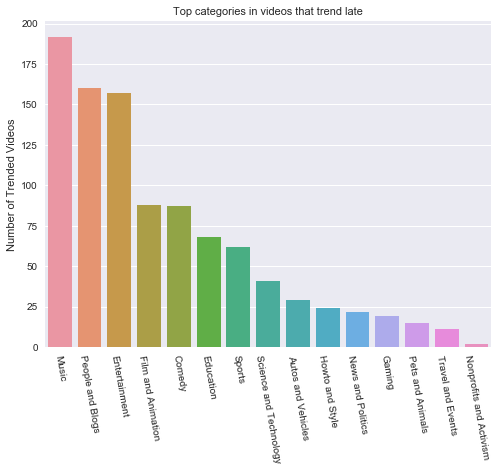

In [12]:
#What are the categories of videos that trend more than 100 days after the published date
allvideos['pdate'], allvideos['ptime'] = allvideos['publish_time'].str.split('T', 1).str
allvideos['trending_date'] = '20' + allvideos['trending_date'].astype(str)
allvideos['trending_date'] = pd.to_datetime(allvideos['trending_date'],format='%Y.%d.%m',errors='coerce')
allvideos['pdate'] = pd.to_datetime(allvideos['pdate'],errors='coerce')
allvideos['date_diff'] = allvideos['trending_date'] - allvideos['pdate']
allvideos['date_diff'] = (allvideos['date_diff'] / np.timedelta64(1, 'D')).astype(float)
times = pd.DataFrame()
times = allvideos.loc[allvideos[allvideos['date_diff']>100].groupby("video_id",as_index=True)["date_diff"].idxmin()]

catdict = {1:'Film and Animation',2:'Autos and Vehicles',10:'Music',15:'Pets and Animals',17:'Sports',19:'Travel and Events',
          20:'Gaming',22:'People and Blogs',23:'Comedy',24:'Entertainment',25:'News and Politics',26:'Howto and Style',27:'Education',
          28:'Science and Technology',29:'Nonprofits and Activism',43:'Shows'}

catlist = times['category_id']
catcount = catlist.reset_index().groupby('category_id').agg('count').head(16)
catcount.reset_index(inplace=True)

catcount["category_name"] = catcount["category_id"].map(catdict)
catcount.sort_values(by=['video_id'],ascending=False,inplace=True)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="category_name", y="video_id", data=catcount)
ax.set_xlabel("")
ax.set_ylabel("Number of Trended Videos")
ax.set_title('Top categories in videos that trend late',fontsize=11)
plt.xticks(rotation=-80)

#plt.figure(figsize=(8, 6))
#ax = sns.distplot(times[times['date_diff']<50]['date_diff'],bins=50,kde=False,rug=True,color="m")
#ax.set_xlim(0,20)
#ax.xaxis.labelpad = 15
#ax.set_title('Time taken between published and trending')
#ax.set_xlabel("Days")
#ax.set_ylabel("Number of Videos")

Text(0.5,0,'Views')

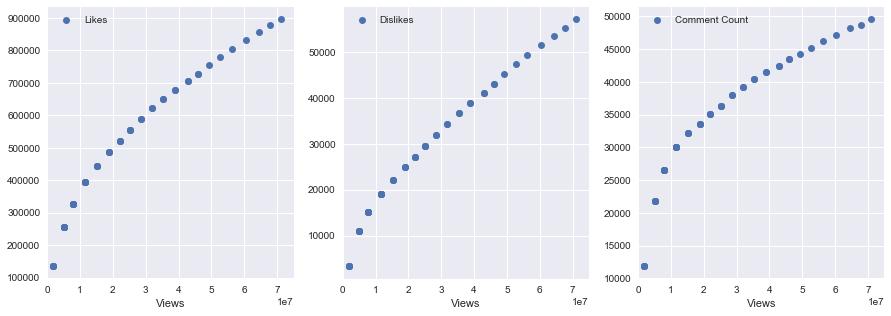

In [18]:
#some features of the video that trended for the longest time in the dataset
allgrpd = allvideos.groupby('video_id').agg('count')
allgrpd['tags'].idxmax()
topvideo = allvideos.loc['l_lblj8Cq0o']
topvideo = topvideo.sort_values(by=['views'],ascending=True)

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
topvideo.plot(ax=axes[0],x='views',y='likes',style='o',label="Likes")
topvideo.plot(ax=axes[1],x='views',y='dislikes',style='o',label="Dislikes")
topvideo.plot(ax=axes[2],x='views',y='comment_count',style='o',label="Comment Count")
axes[0].set_xlim(-10,7.5*10**7)
axes[1].set_xlim(-10,7.5*10**7)
axes[2].set_xlim(-10,7.5*10**7)
axes[0].set_xlabel("Views")
axes[1].set_xlabel("Views")
axes[2].set_xlabel("Views")